# Diabetes predicction

## Problem statement and data collection

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pickle import dump
from sklearn.metrics import accuracy_score

In [2]:
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
total_data.to_csv("/workspaces/ml-proyect-decision-trees/data/raw/diabetes.csv", index=False)

## Exploration and data cleaning

In [3]:
total_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
total_data.shape

(768, 9)

In [5]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


There are 8 predictors and 1 target.

All variables are numerical

1) Pregnancies. Number of pregnancies of the patient (numeric)
2) Glucose. Plasma glucose concentration 2 hours after an oral glucose tolerance test (numeric)
3) BloodPressure. Diastolic blood pressure (measured in mm Hg) (numeric)
4) SkinThickness. Triceps skinfold thickness (measured in mm) (numeric)
5) Insulin. 2-hour serum insulin (measured in mu U/ml) (numeric)
6) BMI. Body mass index (numeric)
7) DiabetesPedigreeFunction. Diabetes Pedigree Function (numeric)
8) Age. Age of patient (numeric)
9) Outcome. Class variable (0 or 1), being 0 negative in diabetes and 1, positive (numeric)

### Count and eliminate duplicates

In [6]:
duplicated_count = total_data.duplicated().sum()
duplicated_count

0

## Analysis of univariate variables

### Analysis on numeric variables

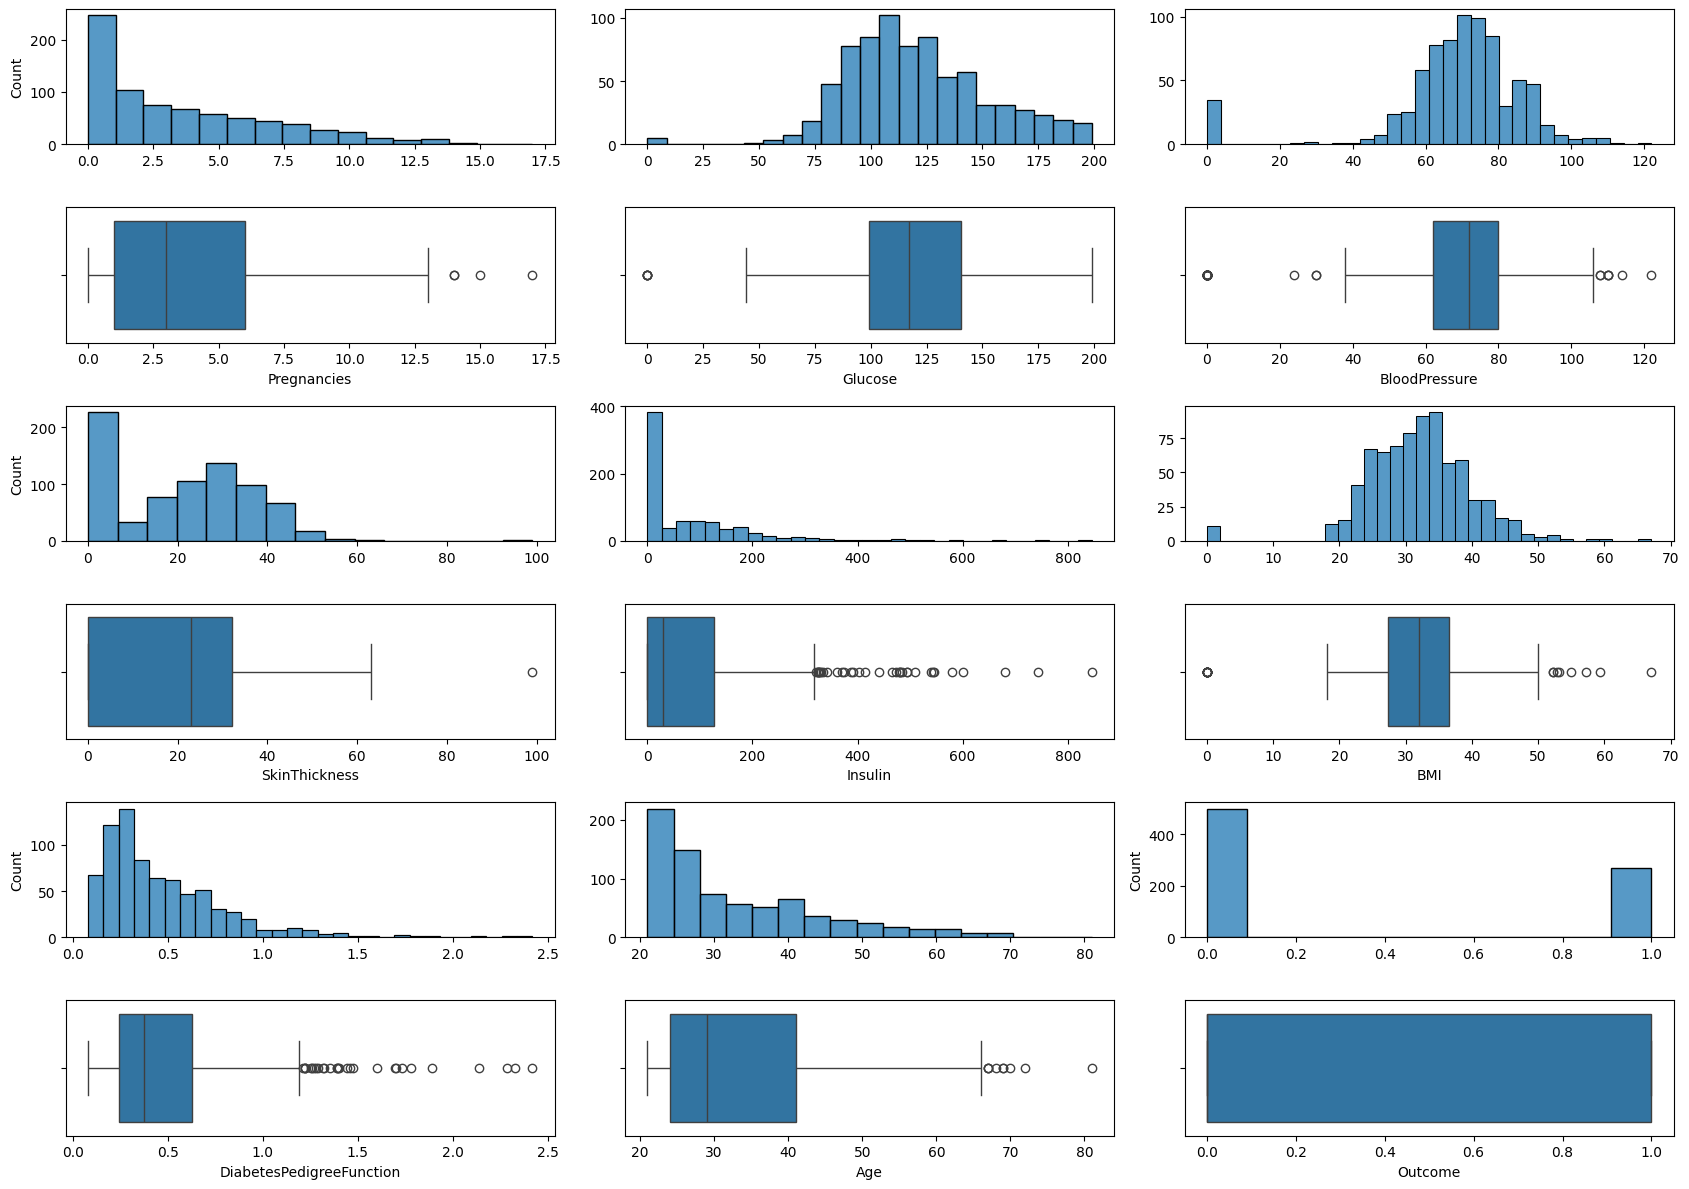

In [7]:
fig, axis = plt.subplots(6, 3, figsize= (17, 12))

sns.histplot(ax = axis[0, 0], data = total_data, x = "Pregnancies").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = total_data, x = "Pregnancies")
sns.histplot(ax = axis[0, 1], data = total_data, x = "Glucose").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = total_data, x = "Glucose")
sns.histplot(ax = axis[0, 2], data = total_data, x = "BloodPressure").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 2], data = total_data, x = "BloodPressure")
sns.histplot(ax = axis[2, 0], data = total_data, x = "SkinThickness").set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = total_data, x = "SkinThickness")
sns.histplot(ax = axis[2, 1], data = total_data, x = "Insulin").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = total_data, x = "Insulin")
sns.histplot(ax = axis[2, 2], data = total_data, x = "BMI").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 2], data = total_data, x = "BMI")
sns.histplot(ax = axis[4, 0], data = total_data, x = "DiabetesPedigreeFunction").set(xlabel = None)
sns.boxplot(ax = axis[5, 0], data = total_data, x = "DiabetesPedigreeFunction")
sns.histplot(ax = axis[4, 1], data = total_data, x = "Age").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[5, 1], data = total_data, x = "Age")
sns.histplot(ax = axis[4, 2], data = total_data, x = "Outcome").set(xlabel = None)
sns.boxplot(ax = axis[5, 2], data = total_data, x = "Outcome")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


on this graphs, we can observe:

1) Pregnancies: There is a left-skewed distribution, where the mode is to the left of the median, with a tail extending towards the right.
2) Glucose:
3) BloodPressure:
4) SkinThickness:
5) Insulin:
6) BMI:
7) DiabetesPedigreeFunction:
8) Age:
9) Outcome:

## Analysis of multivariate variables

### Numerical-numerical analysis

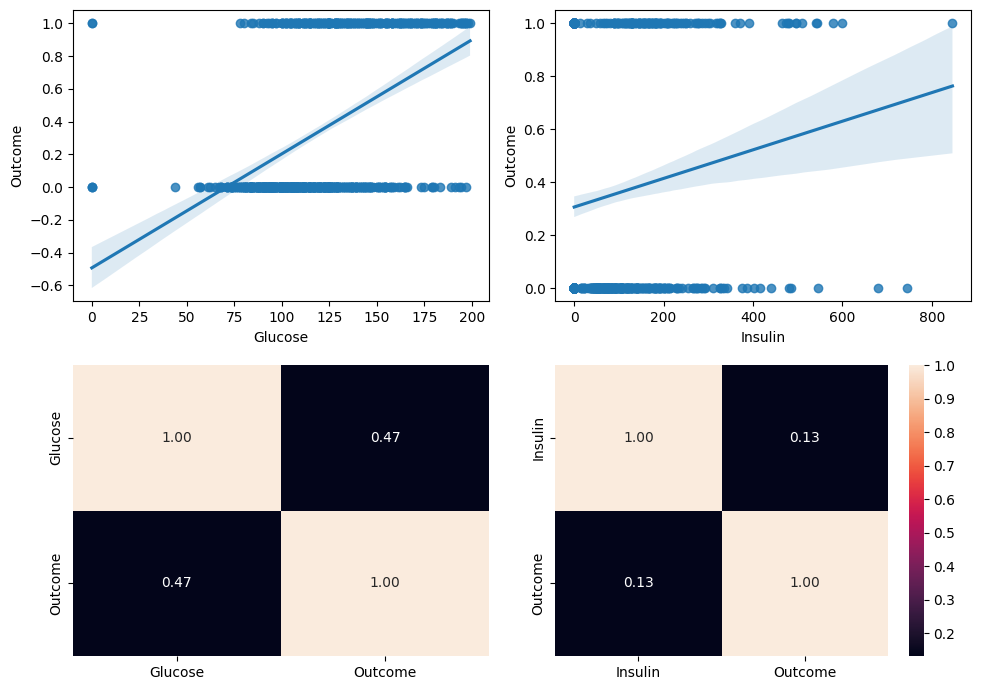

In [8]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Create a multiple scatter diagram
sns.regplot(ax = axis[0, 0], data = total_data, x = "Glucose", y = "Outcome")
sns.heatmap(total_data[["Glucose", "Outcome"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = "Insulin", y = "Outcome")
sns.heatmap(total_data[["Insulin", "Outcome"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

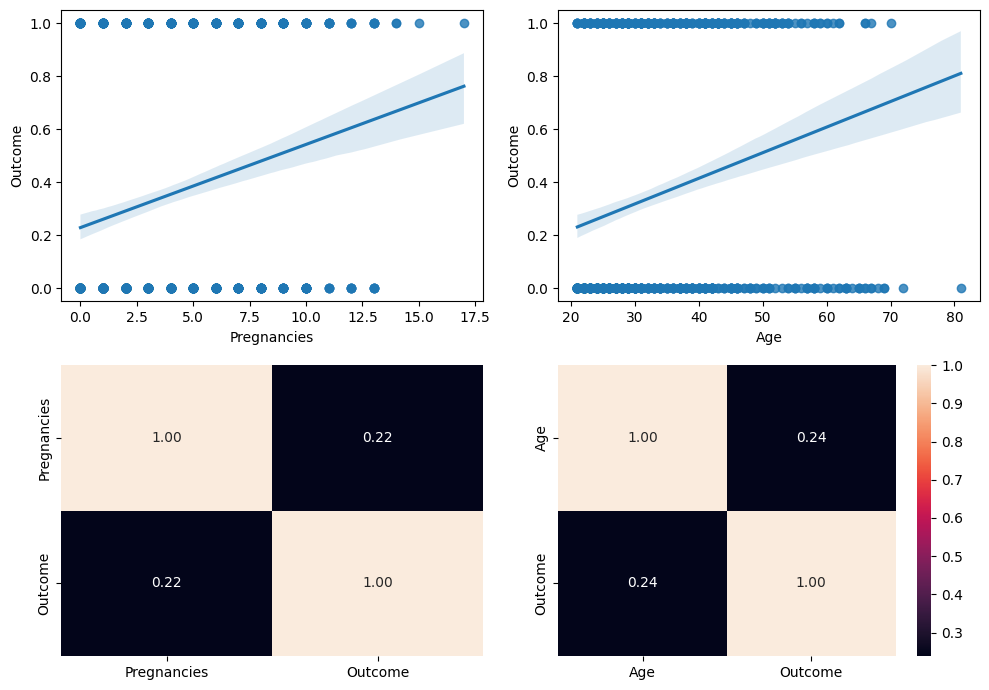

In [9]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Create a multiple scatter diagram
sns.regplot(ax = axis[0, 0], data = total_data, x = "Pregnancies", y = "Outcome")
sns.heatmap(total_data[["Pregnancies", "Outcome"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = "Age", y = "Outcome")
sns.heatmap(total_data[["Age", "Outcome"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

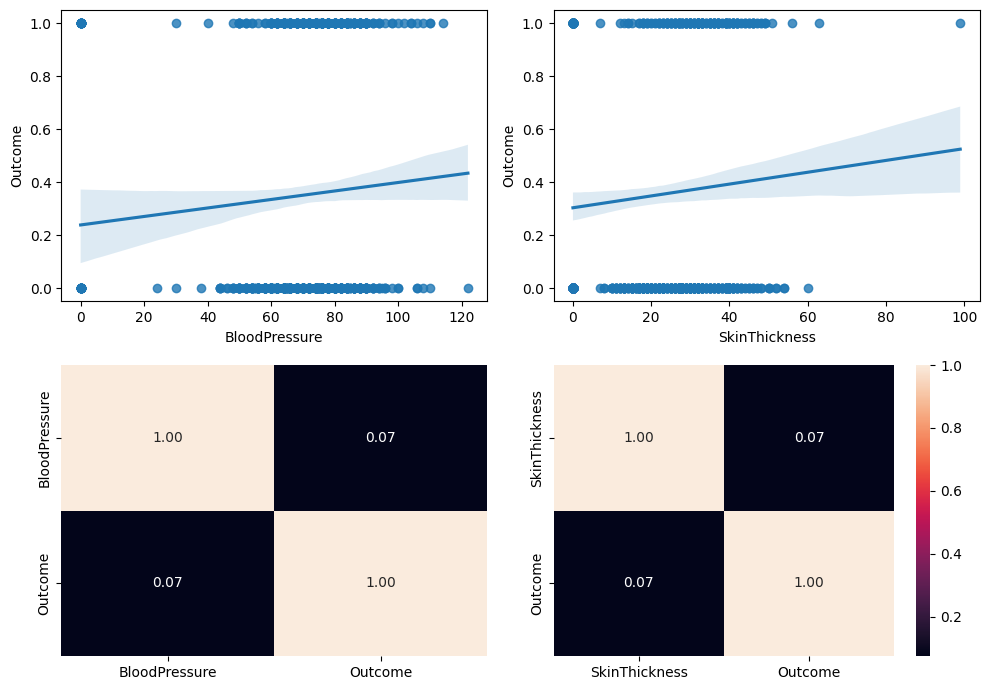

In [10]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Create a multiple scatter diagram
sns.regplot(ax = axis[0, 0], data = total_data, x = "BloodPressure", y = "Outcome")
sns.heatmap(total_data[["BloodPressure", "Outcome"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = "SkinThickness", y = "Outcome")
sns.heatmap(total_data[["SkinThickness", "Outcome"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

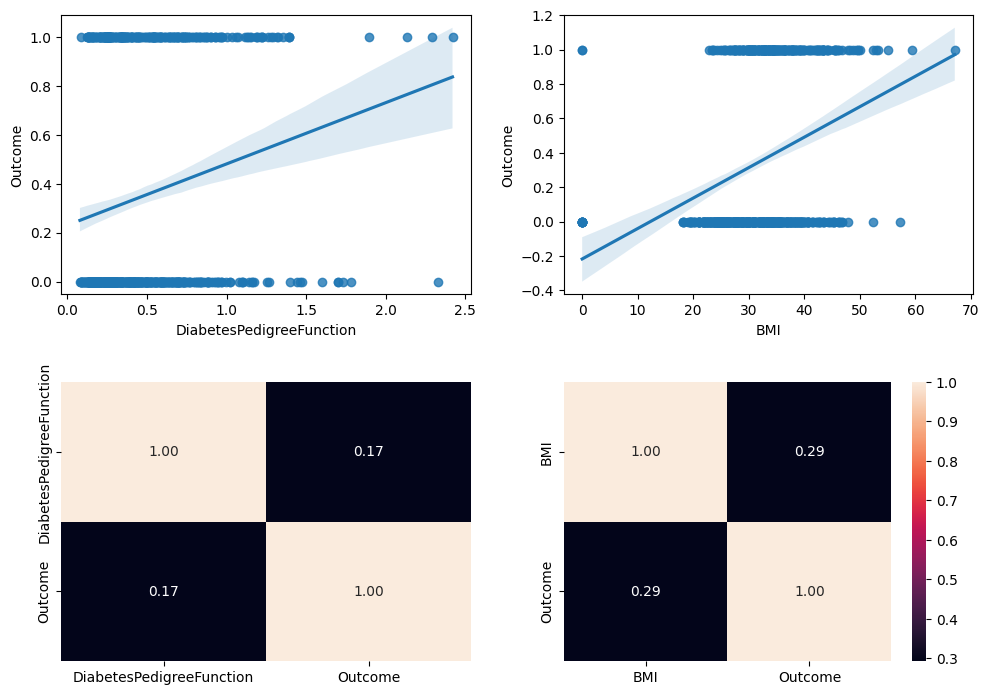

In [11]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Create a multiple scatter diagram
sns.regplot(ax = axis[0, 0], data = total_data, x = "DiabetesPedigreeFunction", y = "Outcome")
sns.heatmap(total_data[["DiabetesPedigreeFunction", "Outcome"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = "BMI", y = "Outcome")
sns.heatmap(total_data[["BMI", "Outcome"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

### Correlation analysis

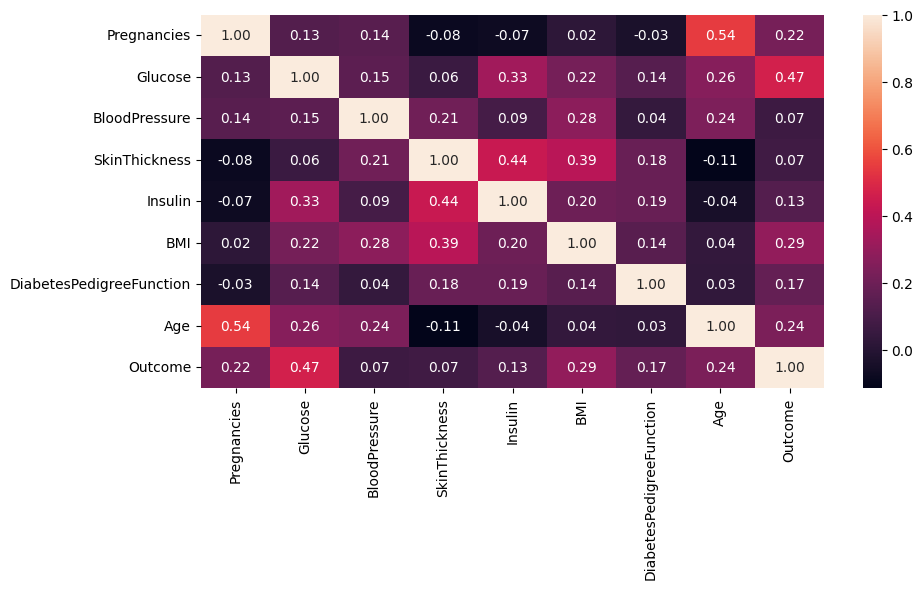

In [12]:
fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(total_data.corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

## Feature engineering

### Outlier analysis

In [13]:
total_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


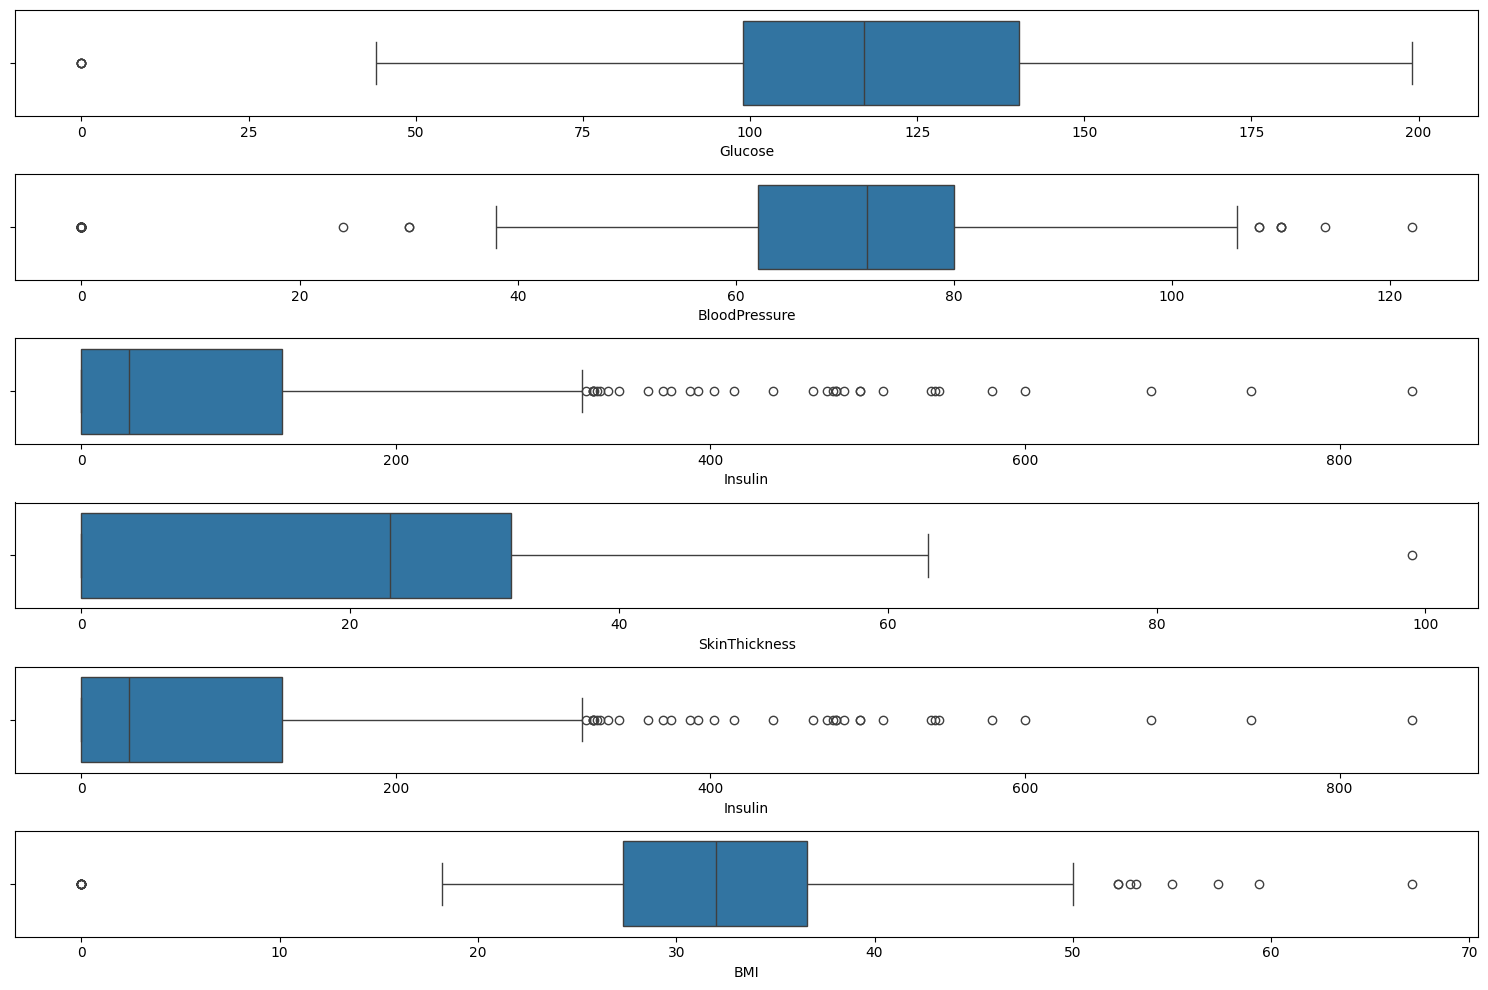

In [14]:
fig, axis = plt.subplots(6, 1, figsize = (15, 10))

sns.boxplot(ax = axis[0], data = total_data, x = "Glucose")
sns.boxplot(ax = axis[1], data = total_data, x = "BloodPressure")
sns.boxplot(ax = axis[2], data = total_data, x = "Insulin")
sns.boxplot(ax = axis[3], data = total_data, x = "SkinThickness")
sns.boxplot(ax = axis[4], data = total_data, x = "Insulin")
sns.boxplot(ax = axis[5], data = total_data, x = "BMI")

plt.tight_layout()

plt.show()

In [15]:
for column in total_data:
    print(column, total_data[total_data[column] == 0].shape)

Pregnancies (111, 9)
Glucose (5, 9)
BloodPressure (35, 9)
SkinThickness (227, 9)
Insulin (374, 9)
BMI (11, 9)
DiabetesPedigreeFunction (0, 9)
Age (0, 9)
Outcome (500, 9)


### Numerical imputation

In [16]:
glucose_median = total_data["Glucose"].median()
bloodPressure_median = total_data["BloodPressure"].median()
insulin_median = total_data["Insulin"].median()
skinThickness_median = total_data["SkinThickness"].median()
bmi_median = total_data["BMI"].median()

glucose_median, bloodPressure_median, insulin_median, skinThickness_median, bmi_median

(117.0, 72.0, 30.5, 23.0, 32.0)

In [17]:
total_data.loc[total_data["Glucose"] == 0, "Glucose"] = glucose_median
total_data.loc[total_data["BloodPressure"] == 0, "BloodPressure"] = bloodPressure_median
total_data.loc[total_data["Insulin"] == 0, "Insulin"] = insulin_median
total_data.loc[total_data["SkinThickness"] == 0, "SkinThickness"] = skinThickness_median
total_data.loc[total_data["BMI"] == 0, "BMI"] = bmi_median

/tmp/ipykernel_8367/3458512044.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '30.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  total_data.loc[total_data["Insulin"] == 0, "Insulin"] = insulin_median


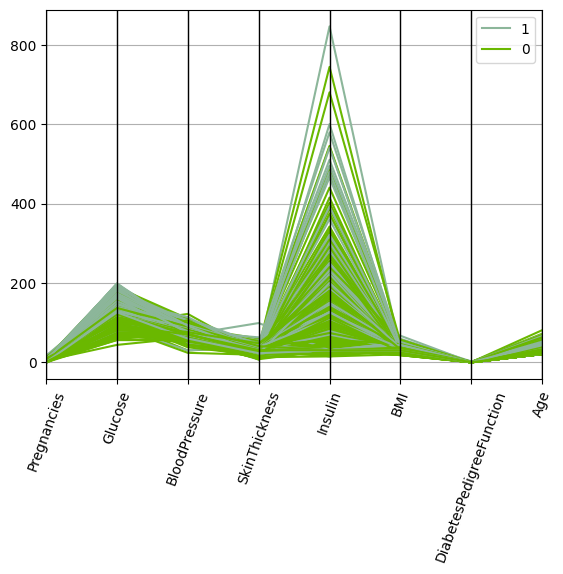

In [18]:
pd.plotting.parallel_coordinates(total_data, "Outcome")
plt.tick_params(axis = "x", labelrotation=70)

## Feature selection

In [19]:
total_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [20]:
from sklearn.model_selection import train_test_split

num_variables = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

# We divide the dataset into training and test samples.

X, y = total_data[num_variables], total_data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 24, stratify= y)

X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
153,1,153,82,42,485.0,40.6,0.687,23
631,0,102,78,40,90.0,34.5,0.238,24
475,0,137,84,27,30.5,27.3,0.231,59
225,1,87,78,27,32.0,34.6,0.101,22
213,0,140,65,26,130.0,42.6,0.431,24


In [21]:
X_train.to_csv("/workspaces/ml-proyect-decision-trees/data/interim/train_x.csv", index=False)
y_train.to_csv("/workspaces/ml-proyect-decision-trees/data/interim/train_y.csv", index=False)
X_test.to_csv("/workspaces/ml-proyect-decision-trees/data/interim/test_x.csv", index=False)
y_test.to_csv("/workspaces/ml-proyect-decision-trees/data/interim/test_y.csv", index=False)

In [22]:
from sklearn.feature_selection import f_classif, SelectKBest

# With a value of k = 5 we implicitly mean that we want to remove 2 features from the dataset
selection_model = SelectKBest(f_classif, k= (int(len(X_train.columns)*0.70)))
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel["Outcome"] = list(y_train)
X_test_sel["Outcome"] = list(y_test)

dump(selection_model, open("/workspaces/ml-proyect-decision-trees/models/selection_model_70.pk", "wb"))

X_train_sel.head()

,Pregnancies,Glucose,SkinThickness,BMI,Age,Outcome
0,1.0,153.0,42.0,40.6,23.0,0
1,0.0,102.0,40.0,34.5,24.0,0
2,0.0,137.0,27.0,27.3,59.0,0
3,1.0,87.0,27.0,34.6,22.0,0
4,0.0,140.0,26.0,42.6,24.0,1


In [23]:
X_train_sel.to_csv("/workspaces/ml-proyect-decision-trees/data/processed/train_x_sel_70.csv", index= False) 
X_test_sel.to_csv("/workspaces/ml-proyect-decision-trees/data/processed/test_x_sel_70.csv", index= False)

In [24]:
from sklearn.feature_selection import f_classif, SelectKBest

# With a value of k = 5 we implicitly mean that we want to remove 2 features from the dataset
selection_model = SelectKBest(f_classif, k= (int(len(X_train.columns)*0.80)))
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel["Outcome"] = list(y_train)
X_test_sel["Outcome"] = list(y_test)

dump(selection_model, open("/workspaces/ml-proyect-decision-trees/models/selection_model_80.pk", "wb"))

X_train_sel.head()

,Pregnancies,Glucose,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.0,153.0,42.0,40.6,0.687,23.0,0
1,0.0,102.0,40.0,34.5,0.238,24.0,0
2,0.0,137.0,27.0,27.3,0.231,59.0,0
3,1.0,87.0,27.0,34.6,0.101,22.0,0
4,0.0,140.0,26.0,42.6,0.431,24.0,1


In [25]:
X_train_sel.to_csv("/workspaces/ml-proyect-decision-trees/data/processed/train_x_sel_80.csv", index= False) 
X_test_sel.to_csv("/workspaces/ml-proyect-decision-trees/data/processed/test_x_sel_80.csv", index= False)

In [29]:
from sklearn.tree import DecisionTreeClassifier
accs = []
for p in [1, 0.8, 0.7, 0.6, 0.5]:
    selection_model = SelectKBest(f_classif, k = int(len(X_train.columns) * p))
    selection_model.fit(X_train, y_train)

    ix = selection_model.get_support()
    train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])

    #dump(selection_model, open(r"C:\Users\user\4Geeks\Módulos\Módulo13\Modo 2\pruebaaaaa.pk", "wb"))

    model = DecisionTreeClassifier(random_state = 14)
    model.fit(train_sel, y_train)
    y_pred = model.predict(train_sel)
    acc = accuracy_score(y_train, y_pred)
    accs.append(acc)

best_acc = accs.index(max(accs))

best_index=int(len(X_train.columns)*[1, 0.8, 0.7, 0.6, 0.5][best_acc])
best_index

In [31]:
best_index=int(len(X_train.columns)*[1, 0.8, 0.7, 0.6, 0.5][best_acc])
best_index

8